In [1]:
import numpy as np
import pandas as pd


In [9]:
df= pd.read_csv('Churn_Modelling.csv')
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.duplicated().sum()

0

In [10]:
df['Exited'].value_counts()#Imbalance classification

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)


In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Categorical One Hot Encoding

In [25]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

##Scaling Values

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
y=df['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
X_train.shape

(8000, 11)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [32]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [98]:
model = Sequential()
model.add(Dense(5, activation='relu', input_dim=11))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [99]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 60        
                                                                 
 dense_17 (Dense)            (None, 5)                 30        
                                                                 
 dense_18 (Dense)            (None, 1)                 6         
                                                                 
Total params: 96 (384.00 Byte)
Trainable params: 96 (384.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [101]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6457 - accuracy: 0.6783 - val_loss: 0.5300 - val_accuracy: 0.8062
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.8014 - val_loss: 0.4619 - val_accuracy: 0.8062
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8056 - val_loss: 0.4396 - val_accuracy: 0.8150
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8114 - val_loss: 0.4269 - val_accuracy: 0.8156
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.8127 - val_loss: 0.4184 - val_accuracy: 0.8175
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8123 - val_loss: 0.4108 - val_accuracy: 0.8188
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8153 - val_loss: 0.4041 - val_accuracy: 0.8175

In [102]:
model.layers[0].get_weights()

[array([[-4.0740646e-02,  1.6084316e-01,  4.9198348e-02,  2.8846370e-02,
         -9.2804367e-03],
        [ 3.6282635e-01,  2.4660026e-01, -2.8074172e-01, -9.7214860e-01,
          2.0656273e-01],
        [ 1.6095097e-01, -1.8953076e-01, -1.7142458e-02, -5.6563787e-02,
          2.5406277e-01],
        [-4.4142231e-01,  5.0020653e-01,  8.9114076e-01,  1.4509085e-01,
          1.6295215e-01],
        [ 1.2732263e+00,  1.2877632e+00,  9.6177995e-01,  1.6731687e-01,
          2.6126206e-01],
        [ 3.7285927e-01, -4.2137074e-01, -4.1786522e-02, -3.8240511e-02,
          3.8364887e-01],
        [-5.1087368e-01,  7.2829086e-01,  3.1142107e-01, -2.3595047e-01,
          7.7628905e-01],
        [ 8.9884726e-03,  1.0655265e-01,  2.4032667e-02, -1.5894955e-02,
         -4.1726112e-02],
        [ 2.8343606e-01, -2.3959236e-01, -6.3126671e-01, -2.1510334e-01,
         -3.3367473e-01],
        [ 2.5030112e-02,  2.5471213e-01,  1.2524547e-01, -4.5861498e-02,
          2.8283754e-03],
        [ 

In [103]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [104]:
y_pred=np.where(y_log>0.5,1,0)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

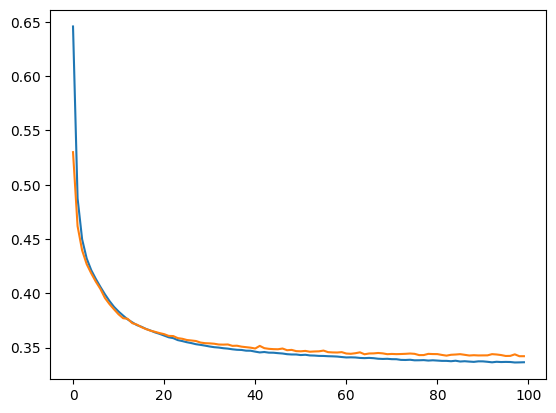

In [106]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

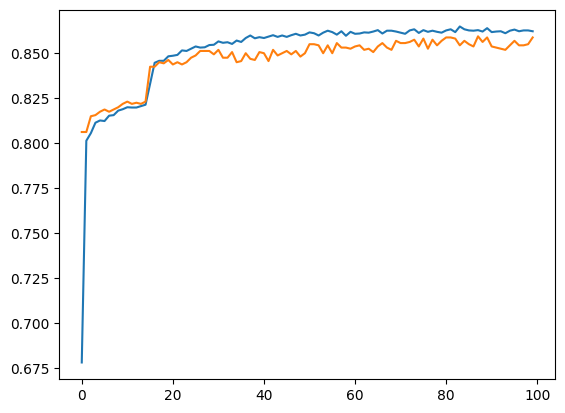

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()